Import libraries


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Settings


In [139]:
pd.reset_option("all")

# ustawienia, które pozwalają zobaczyć WSZYSTKO
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_seq_items", None)
pd.set_option("display.width", 0)
pd.set_option("display.max_colwidth", None)

/tmp/ipykernel_51504/1848041322.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
/tmp/ipykernel_51504/1848041322.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


DATA

In [140]:
data_raw = pd.read_csv(
    "/home/jakub/Pulpit/Programowanie/STAN 11.11.2025-20251111T193929Z-1-001/STAN 11.11.2025/Classification Creditt/data/train.csv"
)

/tmp/ipykernel_51504/1020292792.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(


In [141]:
data_raw.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [142]:
df = data_raw

In [143]:
print(df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [145]:
cols_to_drop = ["SSN", "Customer_ID", "Name", "ID"]
df = df.drop(columns=cols_to_drop)

Months

In [146]:
df["Month"].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

Age

In [147]:
def clean_age_column(df):
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
    df.loc[(df["Age"] < 18) | (df["Age"] > 100), "Age"] = np.nan
    return df


clean_age_column(df)
df["Age"].describe()


count    86937.000000
mean        34.426366
std         10.123932
min         18.000000
25%         26.000000
50%         34.000000
75%         42.000000
max        100.000000
Name: Age, dtype: float64

In [148]:
df["Age"].isna().value_counts()


Age
False    86937
True     13063
Name: count, dtype: int64

Occupation

In [149]:
df["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [150]:
df["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [151]:
print(df["Occupation"].dtypes)

object


In [152]:
def clean_Occupation_column(df):
    df["Occupation"] = df["Occupation"].mask(df["Occupation"] == "_______", np.nan)
    return df


df = clean_Occupation_column(df)

In [153]:
df["Occupation"].isna().value_counts()

Occupation
False    92938
True      7062
Name: count, dtype: int64

In [154]:
df["Occupation"].value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

Annual_income

In [155]:
df["Annual_Income"].describe()

count       100000
unique       18940
top       20867.67
freq            16
Name: Annual_Income, dtype: object

In [156]:
df["Annual_Income"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [157]:
df["Annual_Income"] = pd.to_numeric(
    df["Annual_Income"]
    .replace("[^0-9.,-]", "", regex=True)
    .str.replace(",", ".", regex=False),
    errors="coerce",  # błędne wartości -> NaN
)
#df["Annual_Income"] = df["Annual_Income"].astype(float)


df.loc[(df["Annual_Income"] < 0),"Annual_Income"] = np.nan

In [158]:
df["Annual_Income"].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Monthly_Inhand_Salary

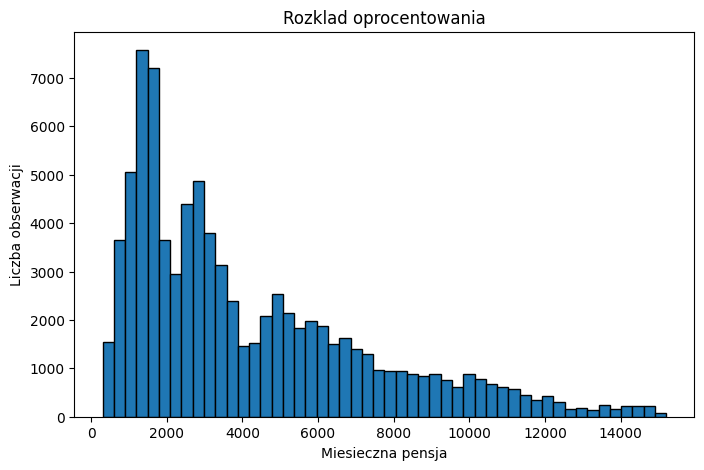

In [159]:
plt.figure(figsize=(8, 5))
plt.hist(df["Monthly_Inhand_Salary"], bins=50, edgecolor="black")
plt.title("Rozklad oprocentowania")
plt.xlabel("Miesieczna pensja")
plt.ylabel("Liczba obserwacji")
plt.show()

In [160]:
df["Monthly_Inhand_Salary"].describe()

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [161]:
df["Monthly_Inhand_Salary"].isna().value_counts()

Monthly_Inhand_Salary
False    84998
True     15002
Name: count, dtype: int64

'Num_Bank_Accounts'

In [162]:
df["Num_Bank_Accounts"].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [163]:
df["Num_Bank_Accounts"].isna().value_counts()

Num_Bank_Accounts
False    100000
Name: count, dtype: int64

In [164]:
def clean_num_bank_accounts(df):
    df.loc[
        (df["Num_Bank_Accounts"] < 0) | (df["Num_Bank_Accounts"] > 10),
        "Num_Bank_Accounts",
    ] = np.nan
    return df


In [165]:
df = clean_num_bank_accounts(df)

In [166]:
df["Num_Bank_Accounts"].describe()

count    98655.000000
mean         5.368466
std          2.592011
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Bank_Accounts, dtype: float64

In [167]:
df["Num_Bank_Accounts"].isna().value_counts()

Num_Bank_Accounts
False    98655
True      1345
Name: count, dtype: int64

Num_Credit_Card

In [168]:
df["Num_Credit_Card"].head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: Num_Credit_Card, dtype: int64

In [169]:
df["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [170]:
def clean_num_credit_card(df):
    df.loc[
        (df["Num_Credit_Card"] <= 0) | (df["Num_Credit_Card"] > 10), "Num_Credit_Card"
    ] = np.nan
    return df

In [171]:
df = clean_num_credit_card(df)

In [172]:
df["Num_Credit_Card"].describe()

count    97680.000000
mean         5.532043
std          2.064570
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Credit_Card, dtype: float64

In [173]:
df["Num_Credit_Card"].isna().value_counts()

Num_Credit_Card
False    97680
True      2320
Name: count, dtype: int64

Interest_Rate

In [174]:
df["Interest_Rate"].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

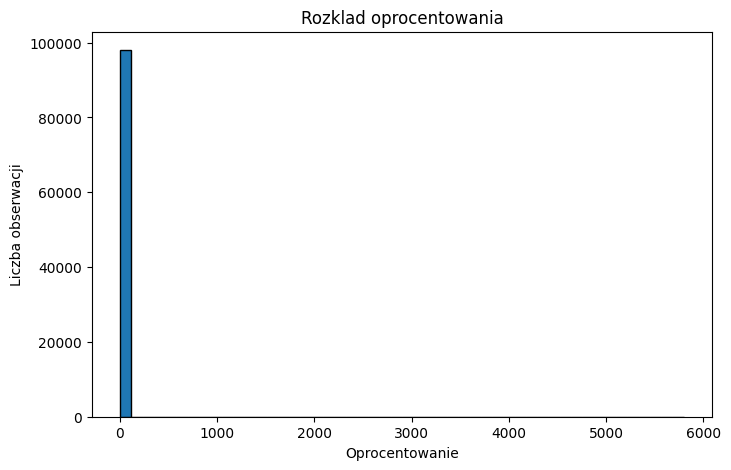

In [175]:
plt.figure(figsize=(8, 5))
plt.hist(df["Interest_Rate"], bins=50, edgecolor="black")
plt.title("Rozklad oprocentowania")
plt.xlabel("Oprocentowanie")
plt.ylabel("Liczba obserwacji")
plt.show()

In [176]:
def clean_intrest_rate(df):
    df.loc[(df["Interest_Rate"] < 0) | (df["Interest_Rate"] > 34), "Interest_Rate"] = (
        np.nan
    )
    return df

In [177]:
df = clean_intrest_rate(df)

In [178]:
df["Interest_Rate"].describe()

count    97966.000000
mean        14.531603
std          8.739748
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [179]:
df["Interest_Rate"].isna().value_counts()

Interest_Rate
False    97966
True      2034
Name: count, dtype: int64

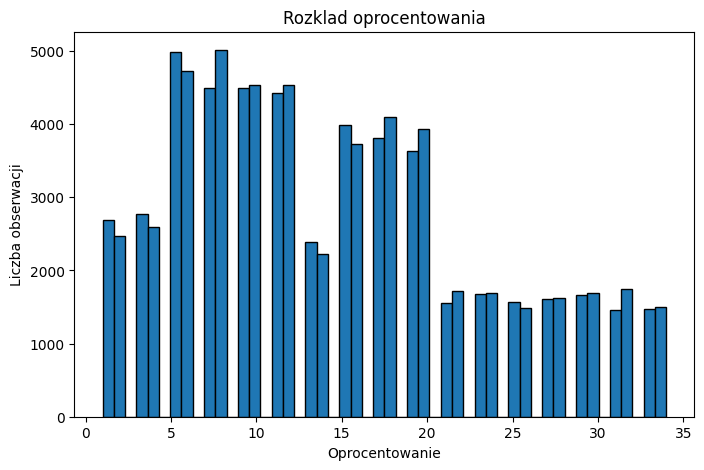

In [180]:
plt.figure(figsize=(8, 5))
plt.hist(df["Interest_Rate"], bins=50, edgecolor="black")
plt.title("Rozklad oprocentowania")
plt.xlabel("Oprocentowanie")
plt.ylabel("Liczba obserwacji")
plt.show()


In [181]:
df["Num_of_Loan"].head(20)

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    3
17    3
18    3
19    3
Name: Num_of_Loan, dtype: object

Num_of_Loan

In [182]:
df["Num_of_Loan"].describe()

count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object

In [183]:
def clean_num_of_loan(df):
    df["Num_of_Loan"] = pd.to_numeric(
        df["Num_of_Loan"]
        .replace("[^0-9.,-]", "", regex=True)
        .str.replace(",", ".", regex=False),
        errors="coerce",
    )
    df.loc[(df["Num_of_Loan"] < 0) | (df["Num_of_Loan"] > 9), "Num_of_Loan"] = np.nan
    return df


df = clean_num_of_loan(df)

In [184]:
df["Num_of_Loan"].describe()

count    95652.000000
mean         3.533758
std          2.447308
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [185]:
df["Num_of_Loan"].isna().value_counts()

Num_of_Loan
False    95652
True      4348
Name: count, dtype: int64

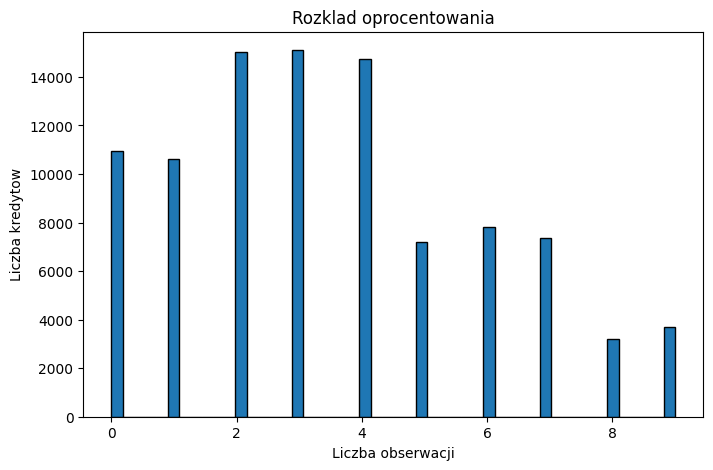

In [186]:
plt.figure(figsize=(8, 5))
plt.hist(df["Num_of_Loan"], bins=50, edgecolor="black")
plt.title("Rozklad oprocentowania")
plt.ylabel("Liczba kredytow")
plt.xlabel("Liczba obserwacji")
plt.show()

Type_of_Loan

In [187]:
df["Type_of_Loan"].describe()

count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object

In [188]:
df["Type_of_Loan"].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      shape=(6261,), dtype=object)

In [189]:
def clean_type_of_loan(df):
    df["Type_of_Loan"] = (
        df["Type_of_Loan"]
        .str.replace(" and ", ", ", regex=False)
        .str.replace(" ,", ",", regex=False)
        .str.replace(",,", ",", regex=False)
        .str.strip()
    )
    df["Type_of_Loan"] = df["Type_of_Loan"].str.split(", ")
    return df


df = clean_type_of_loan(df)

In [190]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Delay_from_due_date

In [191]:
df["Delay_from_due_date"].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

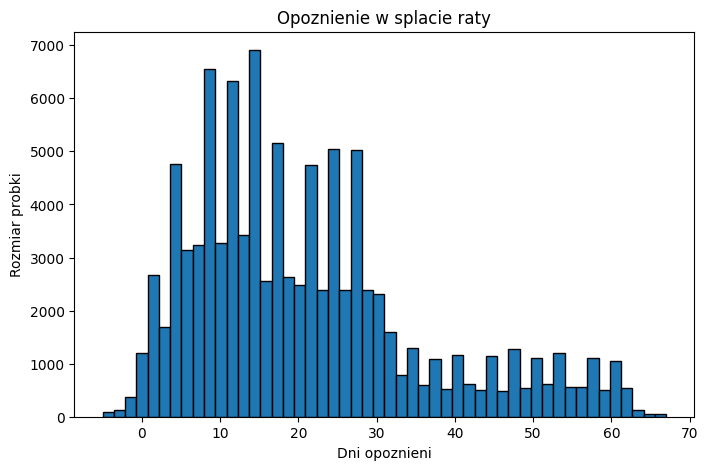

In [192]:
plt.figure(figsize=(8, 5))
plt.hist(df["Delay_from_due_date"], bins=50, edgecolor="black")
plt.title("Opoznienie w splacie raty")
plt.xlabel("Dni opoznieni")
plt.ylabel("Rozmiar probki")
plt.show()

In [193]:
def clean_delay_from_due_date(df):
    df.loc[(df["Delay_from_due_date"] < 0), "Delay_from_due_date"] = np.nan
    return df


df = clean_delay_from_due_date(df)

In [194]:
df["Delay_from_due_date"].describe()

count    99409.000000
mean        21.207245
std         14.794693
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [195]:
df["Delay_from_due_date"].isna().value_counts()

Delay_from_due_date
False    99409
True       591
Name: count, dtype: int64

Num_of_Delayed_Payment

In [196]:
df["Num_of_Delayed_Payment"].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [197]:
def clean_num_of_delayed_payment(df):
    df["Num_of_Delayed_Payment"] = pd.to_numeric(
        df["Num_of_Delayed_Payment"], errors="coerce"
    )
    df.loc[
        (df["Num_of_Delayed_Payment"] < 0) | (df["Num_of_Delayed_Payment"] > 27),
        "Num_of_Delayed_Payment",
    ] = np.nan
    return df


df = clean_num_of_delayed_payment(df)

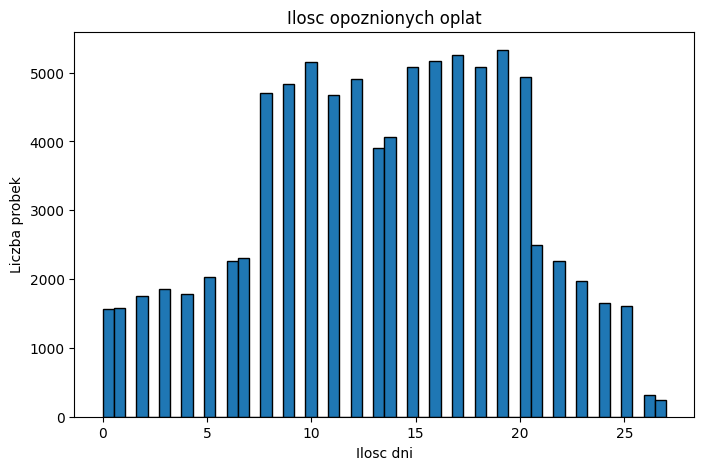

In [198]:
plt.figure(figsize=(8, 5))
plt.hist(df["Num_of_Delayed_Payment"], bins=50, edgecolor="black")
plt.title("Ilosc opoznionych oplat")
plt.xlabel("Ilosc dni")
plt.ylabel("Liczba probek")
plt.show()

In [199]:
df["Num_of_Delayed_Payment"].describe()

count    88785.000000
mean        13.403187
std          6.186629
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         27.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [200]:
df["Num_of_Delayed_Payment"].isna().value_counts()

Num_of_Delayed_Payment
False    88785
True     11215
Name: count, dtype: int64

Changed_Credit_Limit

In [201]:
df["Changed_Credit_Limit"].describe()

count     100000
unique      4384
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object

In [202]:
def clean_changed_credit_limit(df):
    df["Changed_Credit_Limit"] = pd.to_numeric(
        df["Changed_Credit_Limit"], errors="coerce"
    )
    return df


df = clean_changed_credit_limit(df)

In [203]:
df["Changed_Credit_Limit"].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

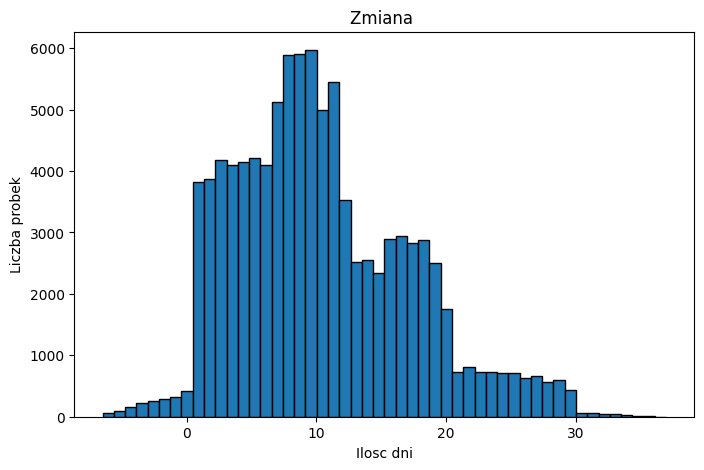

In [204]:
plt.figure(figsize=(8, 5))
plt.hist(df["Changed_Credit_Limit"], bins=50, edgecolor="black")
plt.title("Zmiana ")
plt.xlabel("Ilosc dni")
plt.ylabel("Liczba probek")
plt.show()

Num_Credit_Inquiries - Represents the number of credit card inquiries

In [205]:
df["Num_Credit_Inquiries"].describe()

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [206]:
def clean_num_credit_inquiries(df):
    df.loc[
        (df["Num_Credit_Inquiries"] < 0) | (df["Num_Credit_Inquiries"] > 20),
        "Num_Credit_Inquiries",
    ] = np.nan
    return df


df = clean_num_credit_inquiries(df)

In [207]:
df["Num_Credit_Inquiries"].describe()

count    96385.000000
mean         5.781117
std          3.860712
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64

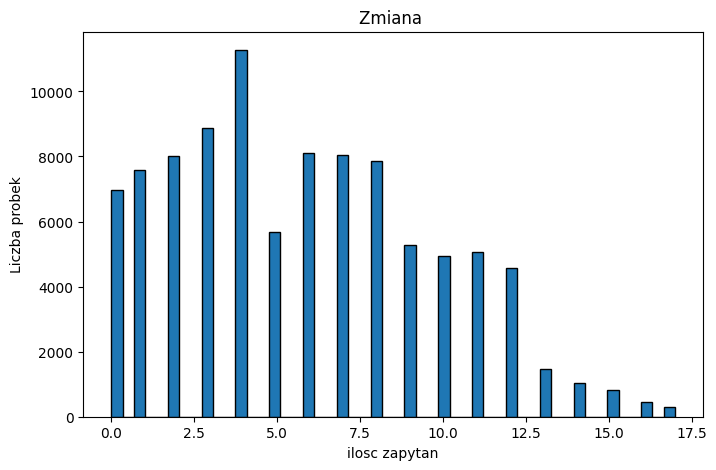

In [208]:
plt.figure(figsize=(8, 5))
plt.hist(df["Num_Credit_Inquiries"], bins=50, edgecolor="black")
plt.title("Zmiana ")
plt.xlabel("ilosc zapytan")
plt.ylabel("Liczba probek")
plt.show()

In [209]:
df["Num_Credit_Inquiries"].isna().value_counts()

Num_Credit_Inquiries
False    96385
True      3615
Name: count, dtype: int64

Credit_Mix

In [210]:
df["Credit_Mix"].describe()

count       100000
unique           4
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

In [211]:
df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [212]:
def clean_credit_mix(df):
    df["Credit_Mix"] = df["Credit_Mix"].mask(df["Credit_Mix"] == "_", np.nan)
    return df


df = clean_credit_mix(df)

In [213]:
df["Credit_Mix"].describe()

count        79805
unique           3
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

In [214]:
df["Credit_Mix"].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [215]:
df["Credit_Mix"].isna().value_counts()

Credit_Mix
False    79805
True     20195
Name: count, dtype: int64

Outstanding_Debt

In [216]:
df["Outstanding_Debt"].describe()

count      100000
unique      13178
top       1360.45
freq           24
Name: Outstanding_Debt, dtype: object

In [217]:
def clean_outstanding_debt(df):
    df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors="coerce")
    return df


df = clean_outstanding_debt(df)

In [218]:
df["Outstanding_Debt"].describe()

count    98991.000000
mean      1426.503700
std       1155.045753
min          0.230000
25%        566.080000
50%       1166.370000
75%       1948.200000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

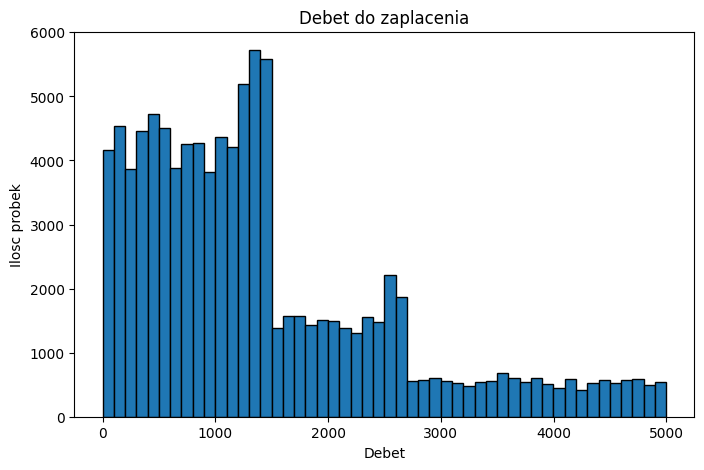

In [219]:
plt.figure(figsize=(8, 5))
plt.hist(df["Outstanding_Debt"], bins=50, edgecolor="black")
plt.title("Debet do zaplacenia")
plt.xlabel("Debet")
plt.ylabel("Ilosc probek")
plt.show()

Credit_Utilization_Ratio

In [220]:
df["Credit_Utilization_Ratio"].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

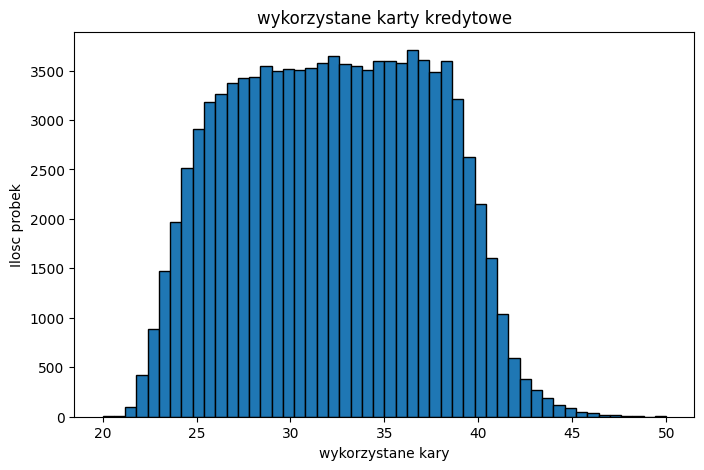

In [221]:
plt.figure(figsize=(8, 5))
plt.hist(df["Credit_Utilization_Ratio"], bins=50, edgecolor="black")
plt.title("wykorzystane karty kredytowe")
plt.xlabel("wykorzystane kary")
plt.ylabel("Ilosc probek")
plt.show()

Credit_History_Age

In [222]:
df["Credit_History_Age"].describe()

count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

In [223]:
def clean_credit_history_age(df):
    df["Credit_History_Age"] = (
        df["Credit_History_Age"]
        .str.extract(r"(\d+)\s+Years.*?(\d+)\s+Months")
        .astype(float)
        .apply(lambda x: x[0] * 12 + x[1], axis=1)
    )
    return df


df = clean_credit_history_age(df)

Payment_of_Min_Amount

In [224]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [225]:
def clean_payment_of_min_amount(df):
    df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM", np.nan)
    return df


df = clean_payment_of_min_amount(df)

In [226]:
df["Payment_of_Min_Amount"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [227]:
df["Payment_of_Min_Amount"].isna().value_counts()

Payment_of_Min_Amount
False    87993
True     12007
Name: count, dtype: int64

Total_EMI_per_month	

In [228]:
df["Total_EMI_per_month"].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [229]:
def clean_total_emi_per_month(df):
    limit = df["Total_EMI_per_month"].quantile(0.95)
    df.loc[df["Total_EMI_per_month"] > limit, "Total_EMI_per_month"] = np.nan
    return df


df = clean_total_emi_per_month(df)

In [230]:
df["Total_EMI_per_month"].describe()

count    95002.000000
mean        95.560964
std         91.744343
min          0.000000
25%         28.629528
50%         64.765007
75%        139.897324
max        437.012753
Name: Total_EMI_per_month, dtype: float64

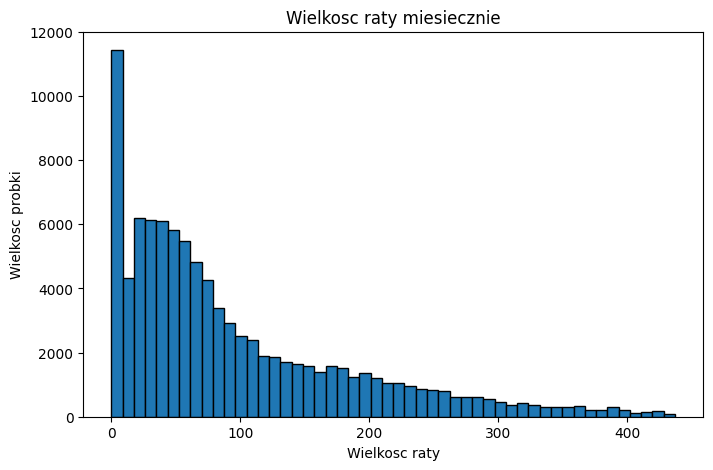

In [231]:
plt.figure(figsize=(8, 5))
plt.hist(df["Total_EMI_per_month"], bins=50, edgecolor="black")
plt.title("Wielkosc raty miesiecznie")
plt.xlabel("Wielkosc raty")
plt.ylabel("Wielkosc probki")
plt.show()

In [232]:
df["Total_EMI_per_month"].isna().sum()

np.int64(4998)

Amount_invested_monthly	

In [233]:
df["Amount_invested_monthly"].describe()

count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

In [234]:
df["Amount_invested_monthly"] = (
    df["Amount_invested_monthly"]
    .astype(str)
    .str.replace("__", "", regex=True)
    .replace("nan", np.nan)
    .astype(float)
)

In [235]:
df["Amount_invested_monthly"].describe()

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [236]:
def clean_amount_invested_monthly(df):
    limit = df["Amount_invested_monthly"].quantile(0.90)
    df.loc[df["Amount_invested_monthly"] > limit, "Amount_invested_monthly"] = np.nan
    return df


df = clean_amount_invested_monthly(df)

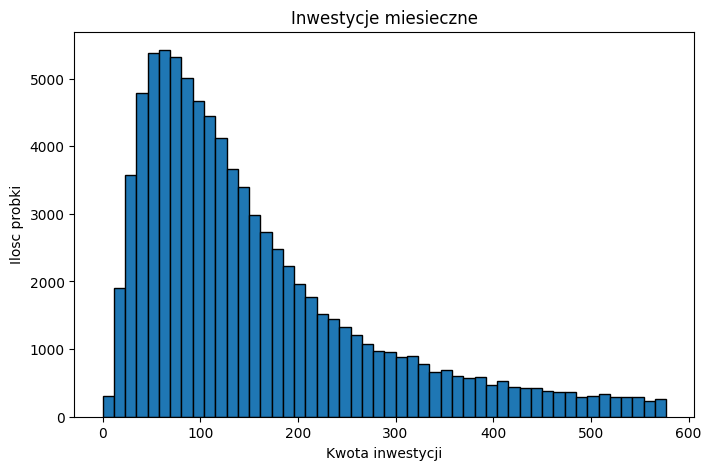

In [237]:
plt.figure(figsize=(8, 5))
plt.hist(df["Amount_invested_monthly"], bins=50, edgecolor="black")
plt.title("Inwestycje miesieczne")
plt.xlabel("Kwota inwestycji")
plt.ylabel("Ilosc probki")
plt.show()

In [238]:
df["Amount_invested_monthly"].describe()

count    85969.000000
mean       157.849115
std        120.717587
min          0.000000
25%         69.484429
50%        121.428910
75%        208.637552
max        577.171032
Name: Amount_invested_monthly, dtype: float64

In [239]:
df["Amount_invested_monthly"].skew()  # pokazuje gdzie bardziej ciąży rozklad danych

np.float64(1.3363482353186222)

Payment_Behaviour

In [240]:
df["Payment_Behaviour"].describe()

count                             100000
unique                                 7
top       Low_spent_Small_value_payments
freq                               25513
Name: Payment_Behaviour, dtype: object

In [241]:
df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [242]:
def clean_payment_behaviour(df):
    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)
    return df


df = clean_payment_behaviour(df)

In [243]:
df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [244]:
df["Payment_Behaviour"].isna().sum()

np.int64(7600)

Monthly_Balance

In [245]:
df["Monthly_Balance"].describe()

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

In [246]:
def clean_monthly_balance(df):
    df["Monthly_Balance"] = (
        df["Monthly_Balance"]
        .astype(str)
        .str.replace("__", "", regex=False)
        .replace("nan", np.nan)
    )
    df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
    df.loc[df["Monthly_Balance"] < 0, "Monthly_Balance"] = np.nan
    return df


df = clean_monthly_balance(df)


In [247]:
df["Monthly_Balance"].describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [248]:
df["Monthly_Balance"].describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

<Axes: >

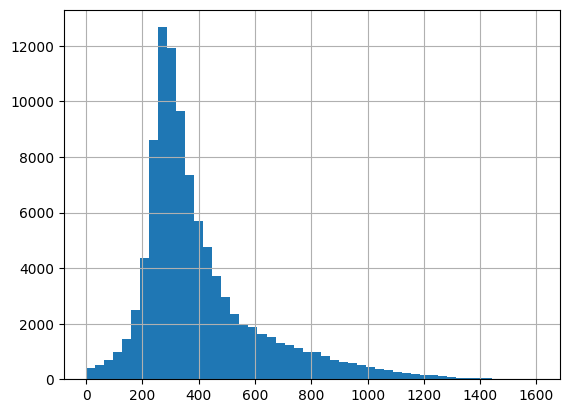

In [249]:
df["Monthly_Balance"].hist(bins=50)


In [250]:
df["Monthly_Balance"].skew()

np.float64(1.5965363556247825)

In [251]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",3.0,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",NaN,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",3.0,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [252]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [253]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",3.0,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",NaN,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",3.0,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan]",6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       86937 non-null   float64
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         98655 non-null   float64
 6   Num_Credit_Card           97680 non-null   float64
 7   Interest_Rate             97966 non-null   float64
 8   Num_of_Loan               95652 non-null   float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       99409 non-null   float64
 11  Num_of_Delayed_Payment    88785 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      96385 non-null   fl

In [255]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,86937.000000,1.000000e+05,84998.000000,98655.000000,97680.000000,97966.000000,95652.000000,99409.000000,88785.000000,97909.000000,96385.000000,98991.000000,100000.000000,90970.000000,95002.000000,85969.000000,98791.000000
mean,34.426366,1.764157e+05,4194.170850,5.368466,5.532043,14.531603,3.533758,21.207245,13.403187,10.389025,5.781117,1426.503700,32.285173,221.195405,95.560964,157.849115,402.551258
std,10.123932,1.429618e+06,3183.686167,2.592011,2.064570,8.739748,2.447308,14.794693,6.186629,6.789496,3.860712,1155.045753,5.116875,99.741364,91.744343,120.717587,213.925499
min,18.000000,7.005930e+03,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,26.000000,1.945750e+04,1625.568229,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,144.000000,28.629528,69.484429,270.106630
50%,34.000000,3.757861e+04,3093.745000,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.370000,32.305784,219.000000,64.765007,121.428910,336.731225
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,8.000000,1948.200000,36.496663,302.000000,139.897324,208.637552,470.262938
max,100.000000,2.419806e+07,15204.633333,10.000000,10.000000,34.000000,9.000000,67.000000,27.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,437.012753,577.171032,1602.040519
